In [1]:
from matplotlib import rcParams
from palettable import colorbrewer

dark2_colors = colorbrewer.get_map('Dark2', 'Qualitative', 7).mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 75
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

cmap = colorbrewer.get_map('RdYlGn', 'diverging', 8, reverse=True).mpl_colormap

In [2]:
import matplotlib.pyplot as plt


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """Minimize chartjunk by stripping out unnecessary plot borders and axis
    ticks.  The top/right/left/bottom keywords toggle whether the
    corresponding plot border is drawn."""
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    # Turn off all ticks.
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    # Now re-enable visible.
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

In [3]:
import numpy as np


CT = np.linspace(-5, 40, 100)
SA = np.linspace(0, 40, 100)
CT, SA = np.meshgrid(CT, SA)

In [4]:
import gsw


pt = gsw.pt_from_CT(SA, CT)
t = gsw.t_from_CT(SA, CT, p=0)

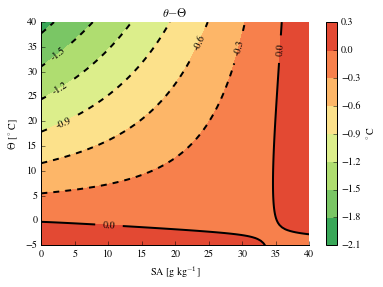

In [5]:
%matplotlib inline

fig, ax = plt.subplots()

cf = ax.contourf(SA, CT, pt-CT, cmap=cmap)
cbar = fig.colorbar(cf)
cbar.ax.set_ylabel(r"$^\circ$C")
cl = ax.contour(SA, CT, pt-CT, colors='k')
ax.clabel(cl, fmt='%.1f')
remove_border(ax, top=False, right=False)
ax.set_title(r"$\theta - \Theta$")
ax.set_ylabel(r"$\Theta$ [$^{\circ}$C]")
_ = ax.set_xlabel(r"SA [g kg$^{-1}$]")

In [6]:
import os


fname = "conservative_temperature.png"
fig.savefig(fname, transparent=True)
_ = os.system('convert -trim %s %s' % (fname, fname))